# Milestone 2: baseline models
___

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from import_preprocess import ImportPreprocess
from evaluate import Evaluation
from simple_baseline import MajorityClassClassifier
from xg_boost import XGBoostClassifier

In [2]:
import_preprocess = ImportPreprocess()
import_preprocess.import_train_dev_test()

X_train, y_train = import_preprocess.X_train, import_preprocess.y_train
X_dev, y_dev = import_preprocess.X_dev, import_preprocess.y_dev
X_test, y_test = import_preprocess.X_test, import_preprocess.y_test

print("Number of training samples:", len(X_train)) 
print("Number of validation samples:", len(X_dev)) 
print("Number of test samples:", len(X_test)) 

Number of training samples: 14000
Number of validation samples: 2000
Number of test samples: 4000


In [3]:
import_preprocess.convert_class_labels()
y_train, y_dev, y_test = import_preprocess.y_train, import_preprocess.y_dev, import_preprocess.y_test

In [4]:
X_train_dev, y_train_dev = import_preprocess.concatenate_train_dev()
len(X_train_dev)

16000

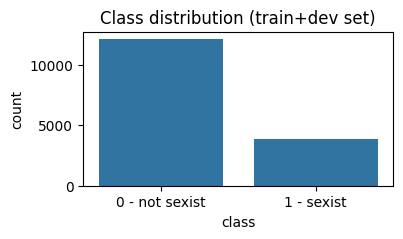

In [5]:
plt.figure(figsize=(4, 2))
sns.countplot(x=y_train_dev)
plt.xticks(ticks=[0, 1], labels=['0 - not sexist', '1 - sexist'])
plt.title('Class distribution (train+dev set)')
plt.xlabel('class')
plt.ylabel('count')

plt.show()

#### a) Traditional (non-DL) baseline models

1. majority class classifier

In [6]:
majority_class_classifier = MajorityClassClassifier()
majority_class_classifier.fit(X_train_dev, y_train_dev)
print("Majority class:", majority_class_classifier.majority_class)

Majority class: 0


Metrics for TRAIN+DEV set
accuracy: 0.7572
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000
########################################

Metrics for TEST set
accuracy: 0.7575
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000


d:\Natural Language Processing\Project new\NLP_24W_VSHJ\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Natural Language Processing\Project new\NLP_24W_VSHJ\my_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


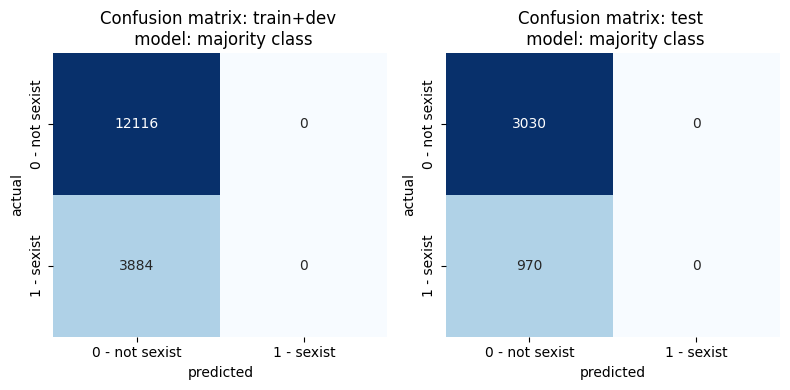

In [7]:
eval_baseline = Evaluation(model=majority_class_classifier)
eval_baseline.evaluate(X_train_dev, y_train_dev, X_test, y_test, plot_confusion=True, model_name="majority class")

2. regex classifier

3. Naive Bayes (NB)

4. XGBoost (using BoW representation)

In [8]:
# get a BoW representation from a list of tokens
X_train_bow, X_dev_bow, X_test_bow, X_train_dev_bow, feature_tokens = import_preprocess.create_bow_representation(max_features=300)
# feature_tokens # most frequenly occuring tokens

In [9]:
xg_boost_bow = XGBoostClassifier()
xg_boost_bow.train(X_train_bow, y_train, X_dev_bow, y_dev)

[0]	train-logloss:0.53193	eval-logloss:0.53723
[1]	train-logloss:0.51431	eval-logloss:0.52352
[2]	train-logloss:0.50007	eval-logloss:0.51216
[3]	train-logloss:0.48820	eval-logloss:0.50334
[4]	train-logloss:0.47855	eval-logloss:0.49671
[5]	train-logloss:0.47021	eval-logloss:0.49069
[6]	train-logloss:0.46321	eval-logloss:0.48565
[7]	train-logloss:0.45708	eval-logloss:0.48162
[8]	train-logloss:0.45157	eval-logloss:0.47800
[9]	train-logloss:0.44715	eval-logloss:0.47518
[10]	train-logloss:0.44303	eval-logloss:0.47317
[11]	train-logloss:0.43920	eval-logloss:0.47105
[12]	train-logloss:0.43602	eval-logloss:0.46948
[13]	train-logloss:0.43282	eval-logloss:0.46714
[14]	train-logloss:0.43031	eval-logloss:0.46602
[15]	train-logloss:0.42782	eval-logloss:0.46496
[16]	train-logloss:0.42549	eval-logloss:0.46407
[17]	train-logloss:0.42322	eval-logloss:0.46317
[18]	train-logloss:0.42098	eval-logloss:0.46199
[19]	train-logloss:0.41915	eval-logloss:0.46103
[20]	train-logloss:0.41745	eval-logloss:0.46053
[2

d:\Natural Language Processing\Project new\NLP_24W_VSHJ\my_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:54:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[35]	train-logloss:0.39661	eval-logloss:0.45697
[36]	train-logloss:0.39575	eval-logloss:0.45689
[37]	train-logloss:0.39457	eval-logloss:0.45659
[38]	train-logloss:0.39364	eval-logloss:0.45668
[39]	train-logloss:0.39237	eval-logloss:0.45651
[40]	train-logloss:0.39133	eval-logloss:0.45630
[41]	train-logloss:0.39040	eval-logloss:0.45661
[42]	train-logloss:0.38913	eval-logloss:0.45639
[43]	train-logloss:0.38813	eval-logloss:0.45653
[44]	train-logloss:0.38717	eval-logloss:0.45641
[45]	train-logloss:0.38612	eval-logloss:0.45611
[46]	train-logloss:0.38479	eval-logloss:0.45607
[47]	train-logloss:0.38384	eval-logloss:0.45607
[48]	train-logloss:0.38252	eval-logloss:0.45596
[49]	train-logloss:0.38183	eval-logloss:0.45585
[50]	train-logloss:0.38137	eval-logloss:0.45563
[51]	train-logloss:0.38066	eval-logloss:0.45588
[52]	train-logloss:0.38014	eval-logloss:0.45560
[53]	train-logloss:0.37936	eval-logloss:0.45563
[54]	train-logloss:0.37858	eval-logloss:0.45556
[55]	train-logloss:0.37758	eval-logloss:

Metrics for TRAIN+DEV set
accuracy: 0.8401
balanced accuracy: 0.6810
precision: 0.9245
recall: 0.3718
########################################

Metrics for TEST set
accuracy: 0.8153
balanced accuracy: 0.6419
precision: 0.8199
recall: 0.3052


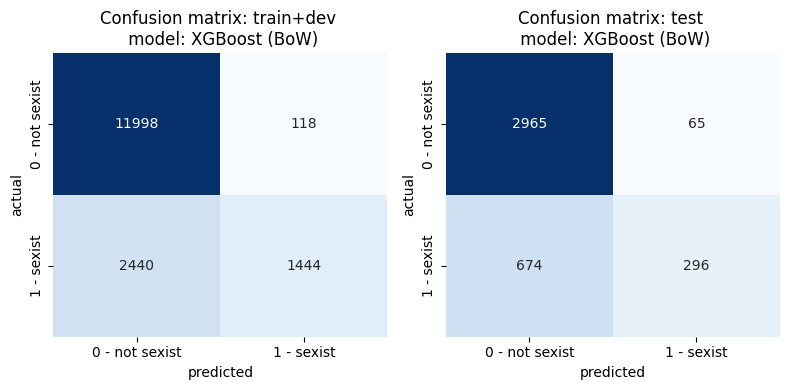

In [10]:
eval_baseline = Evaluation(model=xg_boost_bow)
eval_baseline.evaluate(X_train_dev_bow, y_train_dev, X_test_bow, y_test, plot_confusion=True, model_name="XGBoost (BoW)")

5. XGBoost (word embeddings representation)

#### b) DL baseline models

1. RNN

...